# POMS Automatic Scoring

In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

In [17]:
tsv_path = os.path.join("..", "data", "poms_task02_raw.csv")

df = pd.read_csv(tsv_path, sep=",")

# subtract 1 from all values from the third column to the last
df.iloc[:, 2:] = df.iloc[:, 2:] - 1

df

,ParticipantID,Tempo,Tenso,Irritado,Imprestável,Esgotado,Animado,Confuso,Triste,Activo,...,Inútil,Estourado,Competente,Culpado,Enervado,Infeliz,Alegre,Inseguro,Cansado,Apático
0,1,Antes,1,0,0,2,2,0,2,1,...,0,2,2,1,0,1,2.0,1,2,2
1,1,Depois,1,0,0,2,1,0,1,1,...,0,2,2,1,0,0,2.0,1,2,2
2,3,Antes,2,0,1,2,2,2,0,3,...,1,2,1,1,1,0,3.0,4,4,0
3,5,Antes,1,1,0,0,3,0,1,2,...,0,0,3,0,0,0,3.0,1,0,0
4,5,Depois,2,2,0,1,2,0,0,2,...,0,1,3,0,1,0,NaN,0,2,2
5,6,Antes,1,0,0,1,3,1,1,2,...,0,1,2,0,1,0,3.0,1,2,0
6,6,Depois,1,0,0,1,2,1,1,2,...,0,1,3,0,1,0,3.0,1,1,1
7,7,Antes,2,0,1,1,2,0,0,2,...,0,0,2,1,0,0,2.0,1,1,0
8,7,Depois,0,0,0,0,2,0,0,1,...,0,0,2,0,0,0,2.0,0,1,0
9,8,Antes,2,1,0,1,2,0,1,3,...,0,1,2,1,2,0,3.0,2,1,1


## Scoring

In [18]:
# Invert the scores of Eficaz, Tranquilo, Competente
df["Eficaz"] = 4 - df["Eficaz"]
df["Tranquilo"] = 4 - df["Tranquilo"]
df["Competente"] = 4 - df["Competente"]

df

,ParticipantID,Tempo,Tenso,Irritado,Imprestável,Esgotado,Animado,Confuso,Triste,Activo,...,Inútil,Estourado,Competente,Culpado,Enervado,Infeliz,Alegre,Inseguro,Cansado,Apático
0,1,Antes,1,0,0,2,2,0,2,1,...,0,2,2,1,0,1,2.0,1,2,2
1,1,Depois,1,0,0,2,1,0,1,1,...,0,2,2,1,0,0,2.0,1,2,2
2,3,Antes,2,0,1,2,2,2,0,3,...,1,2,3,1,1,0,3.0,4,4,0
3,5,Antes,1,1,0,0,3,0,1,2,...,0,0,1,0,0,0,3.0,1,0,0
4,5,Depois,2,2,0,1,2,0,0,2,...,0,1,1,0,1,0,NaN,0,2,2
5,6,Antes,1,0,0,1,3,1,1,2,...,0,1,2,0,1,0,3.0,1,2,0
6,6,Depois,1,0,0,1,2,1,1,2,...,0,1,1,0,1,0,3.0,1,1,1
7,7,Antes,2,0,1,1,2,0,0,2,...,0,0,2,1,0,0,2.0,1,1,0
8,7,Depois,0,0,0,0,2,0,0,1,...,0,0,2,0,0,0,2.0,0,1,0
9,8,Antes,2,1,0,1,2,0,1,3,...,0,1,2,1,2,0,3.0,2,1,1


In [19]:
# list all columns
df.columns

Index(['ParticipantID', 'Tempo', 'Tenso', 'Irritado', 'Imprestável',
       'Esgotado', 'Animado', 'Confuso', 'Triste', 'Activo', 'Mal-humorado',
       'Enérgico', 'Sem valor', 'Inquieto', 'Fatigado', 'Aborrecido',
       'Desencorajado', 'Nervoso', 'Só', 'Baralhado', 'Exausto', 'Ansioso',
       'Deprimido', 'Sem energia', 'Miserável', 'Desnorteado', 'Furioso',
       'Eficaz', 'Cheio de vida', 'Com mau feitio', 'Tranquilo', 'Desanimado',
       'Impaciente', 'Cheio de boa disposição', 'Inútil', 'Estourado',
       'Competente', 'Culpado', 'Enervado', 'Infeliz', 'Alegre', 'Inseguro',
       'Cansado', 'Apático'],
      dtype='object')

In [20]:
# replace missing data with 2 (median value)
# df = df.fillna(2)

In [21]:
# estimate Tensão, Depressão, Hostilidade, Vigor, Fadiga, Confusão

df["S_Tension"] = df["Tenso"] + df["Nervoso"] + df["Impaciente"] + df["Inquieto"] + df["Ansioso"]
df["S_Depression"] = df["Triste"] + df["Desencorajado"] + df["Só"] + df["Deprimido"] + df["Desanimado"] + df["Infeliz"]
df["S_Hostility"] = df["Irritado"] + df["Mal-humorado"] + df["Aborrecido"] + df["Furioso"] + df["Com mau feitio"] + df["Enervado"]
df["S_Fatigue"] = df["Esgotado"] + df["Fatigado"] + df["Exausto"] + df["Sem energia"] + df["Cansado"] + df["Estourado"]
df["S_Vigor"] = df["Animado"] + df["Activo"] + df["Enérgico"] + df["Alegre"] + df["Cheio de boa disposição"]
df["S_Confusion"] = df["Confuso"] + df["Baralhado"] + df["Desnorteado"] + df["Inseguro"] + df["Competente"] + df["Eficaz"]

df["S_Total"] = df["S_Tension"] + df["S_Depression"] + df["S_Hostility"] + df["S_Fatigue"] + df["S_Confusion"] - df["S_Vigor"] + 100
df

,ParticipantID,Tempo,Tenso,Irritado,Imprestável,Esgotado,Animado,Confuso,Triste,Activo,...,Inseguro,Cansado,Apático,S_Tension,S_Depression,S_Hostility,S_Fatigue,S_Vigor,S_Confusion,S_Total
0,1,Antes,1,0,0,2,2,0,2,1,...,1,2,2,3,9,2,11,9.0,5,121.0
1,1,Depois,1,0,0,2,1,0,1,1,...,1,2,2,2,6,1,12,7.0,6,120.0
2,3,Antes,2,0,1,2,2,2,0,3,...,4,4,0,15,5,1,15,12.0,18,142.0
3,5,Antes,1,1,0,0,3,0,1,2,...,1,0,0,3,1,1,1,14.0,3,95.0
4,5,Depois,2,2,0,1,2,0,0,2,...,0,2,2,4,1,6,9,NaN,4,NaN
5,6,Antes,1,0,0,1,3,1,1,2,...,1,2,0,7,3,2,7,12.0,8,115.0
6,6,Depois,1,0,0,1,2,1,1,2,...,1,1,1,6,2,1,6,12.0,6,109.0
7,7,Antes,2,0,1,1,2,0,0,2,...,1,1,0,5,1,0,5,11.0,7,107.0
8,7,Depois,0,0,0,0,2,0,0,1,...,0,1,0,0,0,0,5,8.0,4,101.0
9,8,Antes,2,1,0,1,2,0,1,3,...,2,1,1,10,3,6,7,13.0,6,119.0


## Descriptive Statistics

In [22]:
# describe the new columns (df['S_Tension'], df['S_Depression'], df['S_Hostility'],df['S_Fatigue'], df['S_Confusion'], df['S_Vigor'], df['S_Total']) grouped by Tempo (Antes vs. Depois)
df.groupby("Tempo")[
    [
        "S_Tension",
        "S_Depression",
        "S_Hostility",
        "S_Fatigue",
        "S_Confusion",
        "S_Vigor",
        "S_Total",
    ]
].describe()


S_Tension                                               S_Depression  \
           count      mean       std  min  25%  50%  75%   max        count   
Tempo                                                                         
Antes       18.0  5.333333  4.325030  0.0  3.0  3.5  6.5  15.0         18.0   
Depois      17.0  2.294118  2.519045  0.0  0.0  2.0  3.0   9.0         17.0   

                  ... S_Vigor       S_Total                               \
            mean  ...     75%   max   count        mean        std   min   
Tempo             ...                                                      
Antes   2.444444  ...   13.75  17.0    18.0  109.777778  12.530225  94.0   
Depois  1.529412  ...   12.25  18.0    16.0  103.875000  10.190682  84.0   

                                    
          25%    50%    75%    max  
Tempo                               
Antes   99.25  107.5  117.5  142.0  
Depois  96.00  102.0  111.5  120.0  

[2 rows x 56 columns]

## Statistical testing between the two time points - Antes vs. Depois

In [23]:
# compare the df['S_Total] scores between the two groups indicated by the column 'Tempo'
# let's use Mann-Whitney U test

from scipy.stats import mannwhitneyu

group1 = df[df["Tempo"] == "Antes"]
group2 = df[df["Tempo"] == "Depois"]

new_column_name_list = [
    "S_Tension",
    "S_Depression",
    "S_Hostility",
    "S_Fatigue",
    "S_Confusion",
    "S_Vigor",
    "S_Total",
]

for column_name in new_column_name_list:
    print(column_name)
    print(mannwhitneyu(group1[column_name], group2[column_name]))


S_Tension
MannwhitneyuResult(statistic=225.5, pvalue=0.015952298635367488)
S_Depression
MannwhitneyuResult(statistic=187.5, pvalue=0.24594770554054168)
S_Hostility
MannwhitneyuResult(statistic=199.5, pvalue=0.10473096301565467)
S_Fatigue
MannwhitneyuResult(statistic=167.5, pvalue=0.6426315240136604)
S_Confusion
MannwhitneyuResult(statistic=179.5, pvalue=0.3850361698274416)
S_Vigor
MannwhitneyuResult(statistic=nan, pvalue=nan)
S_Total
MannwhitneyuResult(statistic=nan, pvalue=nan)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Antes vs. Depois: Mann-Whitney-Wilcoxon test two-sided, P_val:1.595e-02 U_stat=2.255e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Antes vs. Depois: Mann-Whitney-Wilcoxon test two-sided, P_val:2.459e-01 U_stat=1.875e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Antes vs. Depois: Mann-Whitney-Wilcoxon test two-sided, P_val:1.047e-01 U_stat=1.995e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <=

(0.0, 1.0, 0.0, 1.0)

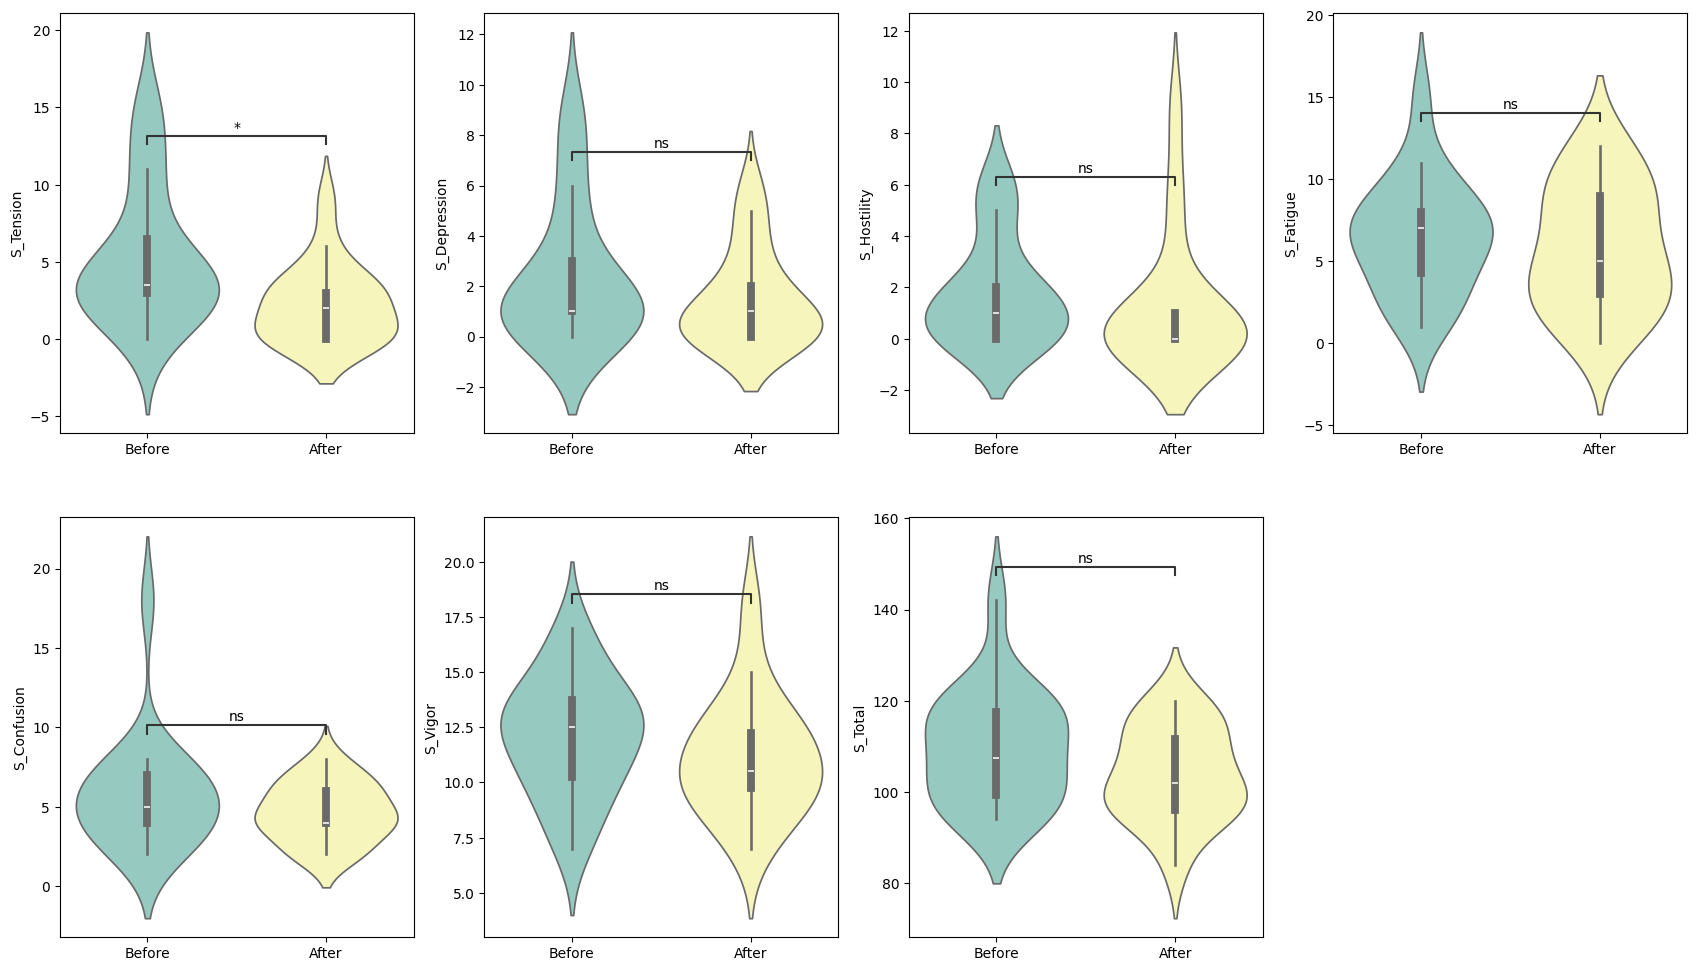

In [24]:
# let's do violin plots for the seven scores in a single figure
fig, ax = plt.subplots(2, 4, figsize=(21, 12))

for i, column_name in enumerate(new_column_name_list):
    sns.violinplot(
        x="Tempo",
        y=column_name,
        data=df,
        ax=ax[i // 4, i % 4],
        palette="Set3",
        hue="Tempo",
    )

    # add statistical annotations
    annotator = Annotator(
        ax[i // 4, i % 4],
        [("Antes", "Depois")],
        data=df,
        x="Tempo",
        y=column_name,
        order=["Antes", "Depois"],
    )
    annotator.configure(test="Mann-Whitney", text_format="star", loc="inside")
    annotator.apply_and_annotate()

    # edit labels
    ax[i // 4, i % 4].set_xlabel("")
    ax[i // 4, i % 4].set_xticks([0, 1])
    ax[i // 4, i % 4].set_xticklabels(["Before", "After"])

# hide the last subplot
ax[1, 3].axis("off")

## Aim for paired test by removing subjects

In [30]:
# get df again
df_paired = pd.read_csv(tsv_path, sep=",")

# subtract 1 from all values from the third column to the last
df_paired.iloc[:, 2:] = df_paired.iloc[:, 2:] - 1

# Invert the scores of Eficaz, Tranquilo, Competente
df_paired["Eficaz"] = 4 - df_paired["Eficaz"]
df_paired["Tranquilo"] = 4 - df_paired["Tranquilo"]
df_paired["Competente"] = 4 - df_paired["Competente"]

# missing data - replace with 2 (median value)
df_paired = df_paired.fillna(2)

# find subjects that only have one response (pre or post) and remove them
df_paired = df_paired.groupby("ParticipantID").filter(lambda x: len(x) == 2)

# short by Sujeito and Tempo
df_paired = df_paired.sort_values(by=["ParticipantID", "Tempo"])

df_paired

,ParticipantID,Tempo,Tenso,Irritado,Imprestável,Esgotado,Animado,Confuso,Triste,Activo,...,Inútil,Estourado,Competente,Culpado,Enervado,Infeliz,Alegre,Inseguro,Cansado,Apático
0,1,Antes,1,0,0,2,2,0,2,1,...,0,2,2,1,0,1,2.0,1,2,2
1,1,Depois,1,0,0,2,1,0,1,1,...,0,2,2,1,0,0,2.0,1,2,2
12,2,Antes,2,0,0,1,2,0,0,3,...,0,0,2,0,2,0,3.0,2,2,0
13,2,Depois,0,0,0,0,2,0,0,2,...,0,0,1,0,0,0,2.0,0,1,1
3,5,Antes,1,1,0,0,3,0,1,2,...,0,0,1,0,0,0,3.0,1,0,0
4,5,Depois,2,2,0,1,2,0,0,2,...,0,1,1,0,1,0,2.0,0,2,2
5,6,Antes,1,0,0,1,3,1,1,2,...,0,1,2,0,1,0,3.0,1,2,0
6,6,Depois,1,0,0,1,2,1,1,2,...,0,1,1,0,1,0,3.0,1,1,1
7,7,Antes,2,0,1,1,2,0,0,2,...,0,0,2,1,0,0,2.0,1,1,0
8,7,Depois,0,0,0,0,2,0,0,1,...,0,0,2,0,0,0,2.0,0,1,0


In [31]:
# estimate Tensão, Depressão, Hostilidade, Vigor, Fadiga, Confusão, Total
df_paired["S_Tension"] = df_paired["Tenso"] + df_paired["Nervoso"] + df_paired["Impaciente"] + df_paired["Inquieto"] + df_paired["Ansioso"]
df_paired["S_Depression"] = (
    df_paired["Triste"] + df_paired["Desencorajado"] + df_paired["Só"] + df_paired["Deprimido"] + df_paired["Desanimado"] + df_paired["Infeliz"]
)
df_paired["S_Hostility"] = (
    df_paired["Irritado"]
    + df_paired["Mal-humorado"]
    + df_paired["Aborrecido"]
    + df_paired["Furioso"]
    + df_paired["Com mau feitio"]
    + df_paired["Enervado"]
)
df_paired["S_Fatigue"] = (
    df_paired["Esgotado"] + df_paired["Fatigado"] + df_paired["Exausto"] + df_paired["Sem energia"] + df_paired["Cansado"] + df_paired["Estourado"]
)
df_paired["S_Vigor"] = df_paired["Animado"] + df_paired["Activo"] + df_paired["Enérgico"] + df_paired["Alegre"] + df_paired["Cheio de boa disposição"]
df_paired["S_Confusion"] = (
    df_paired["Confuso"] + df_paired["Baralhado"] + df_paired["Desnorteado"] + df_paired["Inseguro"] + df_paired["Competente"] + df_paired["Eficaz"]
)

df_paired["S_Total"] = (
    df_paired["S_Tension"]
    + df_paired["S_Depression"]
    + df_paired["S_Hostility"]
    + df_paired["S_Fatigue"]
    + df_paired["S_Confusion"]
    - df_paired["S_Vigor"]
    + 100
)

In [ ]:
# # export a dataframe with the paired data of the seven scores
# df_paired[
#     [
#         "ParticipantID",
#         "Tempo",
#         "S_Tension",
#         "S_Depression",
#         "S_Hostility",
#         "S_Fatigue",
#         "S_Confusion",
#         "S_Vigor",
#         "S_Total",
#     ]
# ].to_csv(
#     os.path.join(sett["git_path"], "data", "POMS_paired_scores.tsv"),
#     sep="\t",
#     index=False,
# )

In [32]:
# descriptive statistics
df_paired.groupby("Tempo")[
    [
        "S_Tension",
        "S_Depression",
        "S_Hostility",
        "S_Fatigue",
        "S_Confusion",
        "S_Vigor",
        "S_Total",
    ]
].describe()

S_Tension                                               S_Depression  \
           count    mean       std  min   25%  50%   75%   max        count   
Tempo                                                                         
Antes       16.0  4.4375  3.558441  0.0  2.75  3.0  5.00  14.0         16.0   
Depois      16.0  2.2500  2.594867  0.0  0.00  1.5  3.25   9.0         16.0   

                ... S_Vigor       S_Total                                    \
          mean  ...     75%   max   count      mean        std   min    25%   
Tempo           ...                                                           
Antes   2.2500  ...    14.0  17.0    16.0  107.1875   9.792642  94.0  98.25   
Depois  1.5625  ...    12.0  18.0    16.0  104.1250  10.397916  84.0  96.00   

                             
          50%    75%    max  
Tempo                        
Antes   106.5  116.0  122.0  
Depois  102.0  114.5  120.0  

[2 rows x 56 columns]

In [33]:
# calculate the difference between the two time points using a Wilcoxon signed-rank test
from scipy.stats import wilcoxon

for column_name in new_column_name_list:
    print(column_name)
    tt = wilcoxon(
        df_paired[df_paired["Tempo"] == "Antes"][column_name],
        df_paired[df_paired["Tempo"] == "Depois"][column_name],
    )

    if column_name == "S_Total":
        print(tt.pvalue)
    else:
        print(tt.pvalue)

S_Tension
0.016196444270695155
S_Depression
0.05804005016348999
S_Hostility
0.3248978701064775
S_Fatigue
0.48330324160257043
S_Confusion
0.3157569237654353
S_Vigor
0.06738494038074666
S_Total
0.11592157569151569


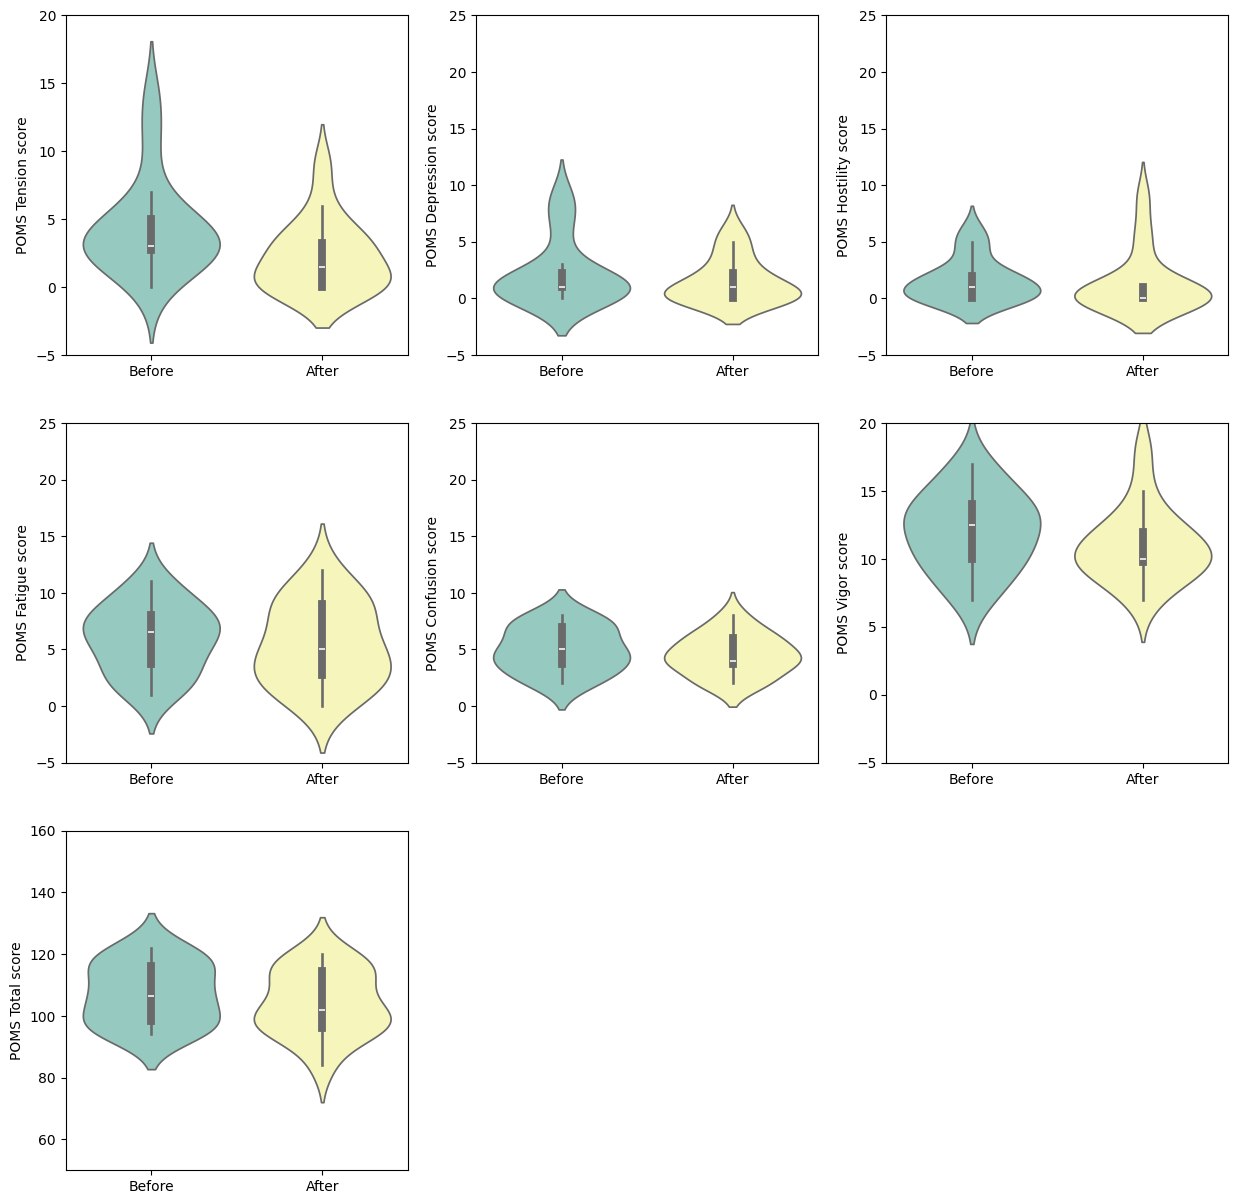

In [34]:
# | label: fig:behav-poms
# let's do violin plots for the seven scores in a single figure
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, column_name in enumerate(new_column_name_list):
    sns.violinplot(
        x="Tempo",
        y=column_name,
        data=df_paired,
        ax=ax[i // 3, i % 3],
        palette="Set3",
        hue="Tempo",
    )

    # add statistical annotations
    annotator = Annotator(
        ax[i // 3, i % 3],
        [("Antes", "Depois")],
        data=df_paired,
        x="Tempo",
        y=column_name,
        order=["Antes", "Depois"],
    )
    annotator.configure(
        test="Wilcoxon",
        text_format="star",
        loc="inside",
        hide_non_significant=True,
        verbose=0,
        comparisons_correction="Bonferroni",
    )

    if column_name == "S_Total":
        annotator.apply_and_annotate()
    else:  # edit the p-value by correcting by 6 comparisons (the six subscales)
        annotator.apply_test(num_comparisons=6)
        annotator.annotate()

    # edit labels
    ax[i // 3, i % 3].set_xlabel("")
    ax[i // 3, i % 3].set_xticks([0, 1])
    ax[i // 3, i % 3].set_xticklabels(["Before", "After"])

    # edit lim
    if column_name == "S_Total":
        ax[i // 3, i % 3].set_ylim([50, 160])
    elif column_name == "S_Tension" or column_name == "S_Vigor":
        ax[i // 3, i % 3].set_ylim([-5, 20])
    else:
        ax[i // 3, i % 3].set_ylim([-5, 25])

    # edit ylabel by trimming 'S_'
    ax[i // 3, i % 3].set_ylabel("POMS " + column_name[2:] + " score")


# hide the last subplot
ax[2, 2].axis("off")
ax[2, 1].axis("off")
plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04



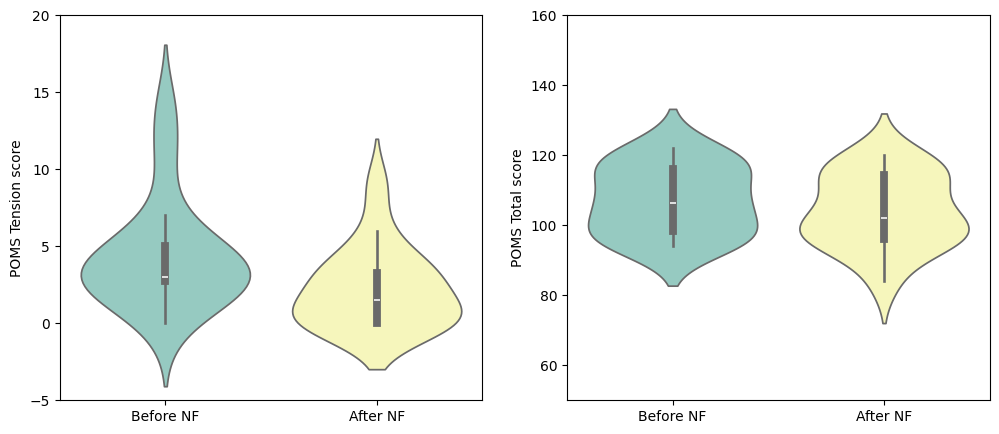

In [35]:
# violin plot for the tension and total score
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i, column_name in enumerate(["S_Tension", "S_Total"]):
    sns.violinplot(x="Tempo", y=column_name, data=df_paired, ax=ax[i], palette="Set3", hue="Tempo")

    # add statistical annotations
    annotator = Annotator(
        ax[i],
        [("Antes", "Depois")],
        data=df_paired,
        x="Tempo",
        y=column_name,
        order=["Antes", "Depois"],
    )
    annotator.configure(
        test="Wilcoxon",
        text_format="star",
        loc="inside",
        hide_non_significant=True,
        verbose=1,
        comparisons_correction="Bonferroni",
    )

    if column_name == "S_Total":
        annotator.apply_and_annotate()
    else:  # edit the p-value by correcting by 6 comparisons (the six subscales)
        annotator.apply_test(num_comparisons=6)
        annotator.annotate()

    # edit labels
    ax[i].set_xlabel("")
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(["Before NF", "After NF"])

    # edit lim
    if column_name == "S_Total":
        ax[i].set_ylim([50, 160])
    else:
        ax[i].set_ylim([-5, 20])

    # edit ylabel by trimming 'S_'
    ax[i].set_ylabel("POMS " + column_name[2:] + " score")

In [36]:
# give me median for the total score
print(df_paired.groupby("Tempo")["S_Total"].median())

print(df_paired.groupby("Tempo")["S_Tension"].median())


Tempo
Antes     106.5
Depois    102.0
Name: S_Total, dtype: float64
Tempo
Antes     3.0
Depois    1.5
Name: S_Tension, dtype: float64
